# Fake News Detection using Machine Learning
Final Year Project - Logistic Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load Data
fake = pd.read_csv('fake.csv')[['title', 'text', 'subject', 'date']]
true = pd.read_csv('true.csv')
fake['label'] = 0
true['label'] = 1
data = pd.concat([fake, true]).reset_index(drop=True)
data = data.dropna(subset=['text'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_22428\1251334076.py:2: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake = pd.read_csv('fake.csv')[['title', 'text', 'subject', 'date']]


In [3]:
# Preprocess and Train
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

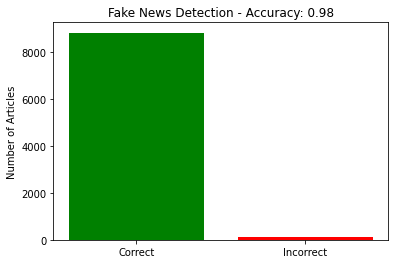

In [7]:
# Plotting Accuracy Graph
import matplotlib.pyplot as plt

# Ensure y_pred is defined
y_pred = model.predict(X_test_vec)

correct = (y_test == y_pred).sum()
incorrect = (y_test != y_pred).sum()
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title(f'Fake News Detection - Accuracy: {accuracy_score(y_test, y_pred):.2f}')
plt.ylabel('Number of Articles')
plt.show()

Accuracy: 0.9845280498664292
Confusion Matrix:
 [[4655   82]
 [  57 4190]]


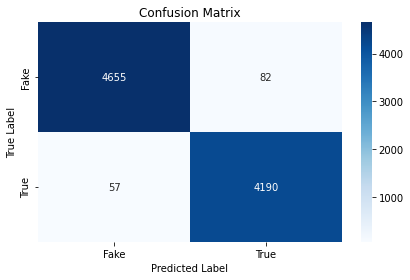

In [8]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_vec)

# Print metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

# First split into training and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

Validation Accuracy: 0.9826357969723953
Validation Confusion Matrix:
 [[3453   66]
 [  51 3168]]


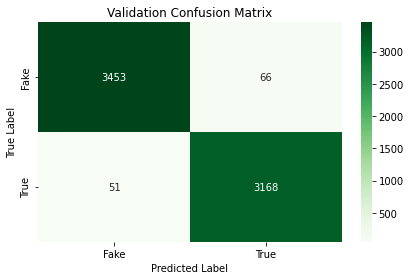

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on validation set
y_val_pred = model.predict(X_val_vec)

# Accuracy & Confusion Matrix
print('Validation Accuracy:', accuracy_score(y_val, y_val_pred))
print('Validation Confusion Matrix:\n', confusion_matrix(y_val, y_val_pred))

# Plot Confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens', xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Validation Confusion Matrix")
plt.tight_layout()
plt.show()


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [16]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    acc = accuracy_score(y_val, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print("Classification Report:")
    print(classification_report(y_val, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


Model: LogisticRegression
Accuracy: 0.9826
Confusion Matrix:
[[3453   66]
 [  51 3168]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3519
           1       0.98      0.98      0.98      3219

    accuracy                           0.98      6738
   macro avg       0.98      0.98      0.98      6738
weighted avg       0.98      0.98      0.98      6738



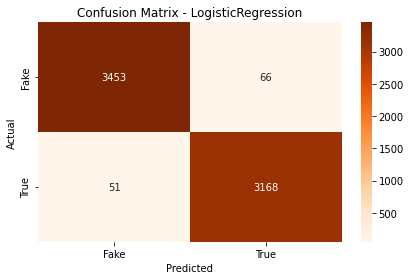

Model: MultinomialNB
Accuracy: 0.9329
Confusion Matrix:
[[3296  223]
 [ 229 2990]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3519
           1       0.93      0.93      0.93      3219

    accuracy                           0.93      6738
   macro avg       0.93      0.93      0.93      6738
weighted avg       0.93      0.93      0.93      6738



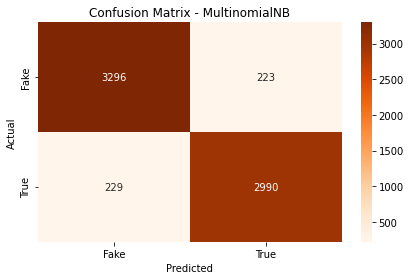

Model: LinearSVC
Accuracy: 0.9921
Confusion Matrix:
[[3488   31]
 [  22 3197]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3519
           1       0.99      0.99      0.99      3219

    accuracy                           0.99      6738
   macro avg       0.99      0.99      0.99      6738
weighted avg       0.99      0.99      0.99      6738



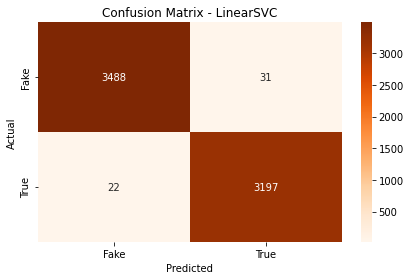

Model: RandomForestClassifier
Accuracy: 0.9865
Confusion Matrix:
[[3467   52]
 [  39 3180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3519
           1       0.98      0.99      0.99      3219

    accuracy                           0.99      6738
   macro avg       0.99      0.99      0.99      6738
weighted avg       0.99      0.99      0.99      6738



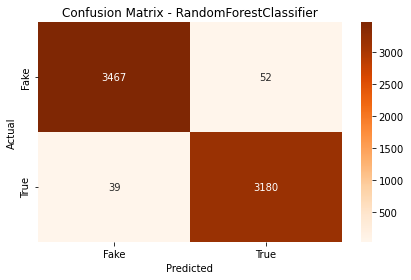

In [20]:
models = [
    LogisticRegression(),
    MultinomialNB(),
    LinearSVC(),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

for model in models:
    evaluate_model(model, X_train_vec, y_train, X_val_vec, y_val)
